In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [342]:
df=pd.read_csv("C:\\Users\\vigne\\Downloads\\_Dataset.csv")
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [344]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [345]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [346]:
int=df.select_dtypes(include='integer')                   
int

,year,selling_price,km_driven
0,2014,450000,145500
1,2014,370000,120000
2,2006,158000,140000
3,2010,225000,127000
4,2007,130000,120000
...,...,...,...
8123,2013,320000,110000
8124,2007,135000,119000
8125,2009,382000,120000
8126,2013,290000,25000


In [347]:
df['mileage_clean']=df['mileage'].str.replace("kmpl",'')
df['engine_clean']=df['engine'].str.replace("CC",'')
df['max_power_clean']=df['max_power'].str.replace("bhp",'')
df['torque_clean'] = df['torque'].str.extract(r'([0-9]+\.?[0-9]*)')
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_clean,engine_clean,max_power_clean,torque_clean
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4,1248,74,190
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52,250
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2,11.5


In [348]:
df['mileage_clean']=pd.to_numeric(df['mileage_clean'], errors='coerce')

In [349]:
df['engine_clean']=pd.to_numeric(df['engine_clean'],errors='coerce')

In [350]:
df['max_power_clean']=pd.to_numeric(df['max_power_clean'],errors='coerce')

In [351]:
df['torque_clean']=pd.to_numeric(df['torque_clean'],errors='coerce')

In [352]:
df.dtypes

name                object
year                 int64
selling_price        int64
km_driven            int64
fuel                object
seller_type         object
transmission        object
owner               object
mileage             object
engine              object
max_power           object
torque              object
seats              float64
mileage_clean      float64
engine_clean       float64
max_power_clean    float64
torque_clean       float64
dtype: object

In [353]:
df['engine_clean'].isnull().sum()


221

In [354]:
df['torque_clean'].value_counts()


torque_clean
200.0    693
190.0    612
90.0     408
113.0    262
114.0    246
        ... 
32.1       1
23.6       1
9.2        1
6.0        1
436.4      1
Name: count, Length: 244, dtype: int64

In [355]:
df['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [356]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

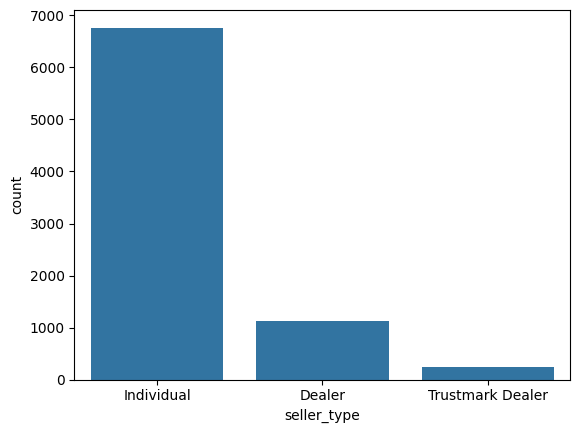

In [357]:
sns.barplot(df['seller_type'].value_counts())
df['seller_type'].value_counts()

In [358]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [359]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'mileage_clean', 'engine_clean', 'max_power_clean',
       'torque_clean'],
      dtype='object')

In [360]:
def boundary(df,columns):
    upper_boundary=df[columns].mean()+3*df[columns].std()
    lower_boundary=df[columns].mean()-3*df[columns].std()
    return upper_boundary,lower_boundary

In [361]:
 up_year,low_year=boundary(df,'year')
print(up_year,low_year)
up_max_power,lo_max_power=boundary(df,'max_power_clean')
print(up_max_power,lo_max_power)

2025.9367570878226 2001.6712645657208
198.98541518802043 -15.94957722037637


In [362]:
df['year'].mean()

2013.8040108267717

In [363]:
df['max_power_clean'].mean()

91.51791898382203

In [364]:
df['max_power_clean'].mode()

0    74.0
Name: max_power_clean, dtype: float64

In [365]:
df['max_power_clean'].median()

82.0

In [366]:
df['max_power_clean']


0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power_clean, Length: 8128, dtype: float64

In [367]:
df1=df[['year', 'selling_price', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats','torque_clean']]

In [368]:
df1.corr()

,year,selling_price,km_driven,mileage_clean,engine_clean,max_power_clean,seats,torque_clean
year,1.000000,0.414092,-0.418006,0.328037,0.018848,0.226320,-0.009144,0.289456
selling_price,0.414092,1.000000,-0.225534,-0.125662,0.455734,0.748489,0.041358,0.619792
km_driven,-0.418006,-0.225534,1.000000,-0.173283,0.205914,-0.038075,0.227336,-0.003322
mileage_clean,0.328037,-0.125662,-0.173283,1.000000,-0.578803,-0.373360,-0.454086,-0.167361
engine_clean,0.018848,0.455734,0.205914,-0.578803,1.000000,0.703975,0.610309,0.628868
max_power_clean,0.226320,0.748489,-0.038075,-0.373360,0.703975,1.000000,0.191999,0.770206
seats,-0.009144,0.041358,0.227336,-0.454086,0.610309,0.191999,1.000000,0.274470
torque_clean,0.289456,0.619792,-0.003322,-0.167361,0.628868,0.770206,0.274470,1.000000


<Axes: >

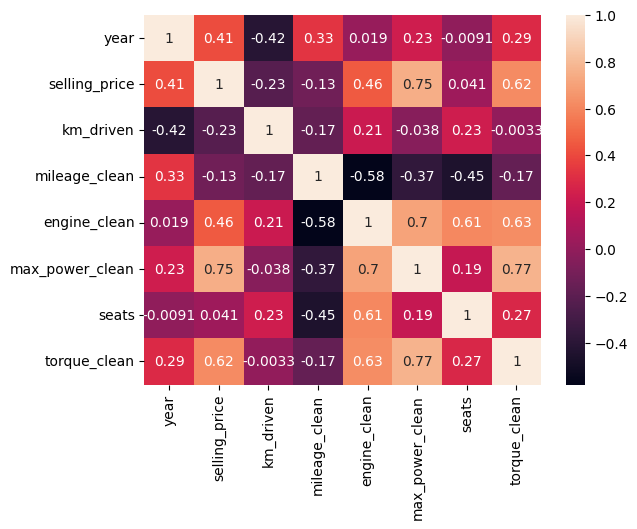

In [416]:
sns.heatmap(df1.corr(),annot=True)

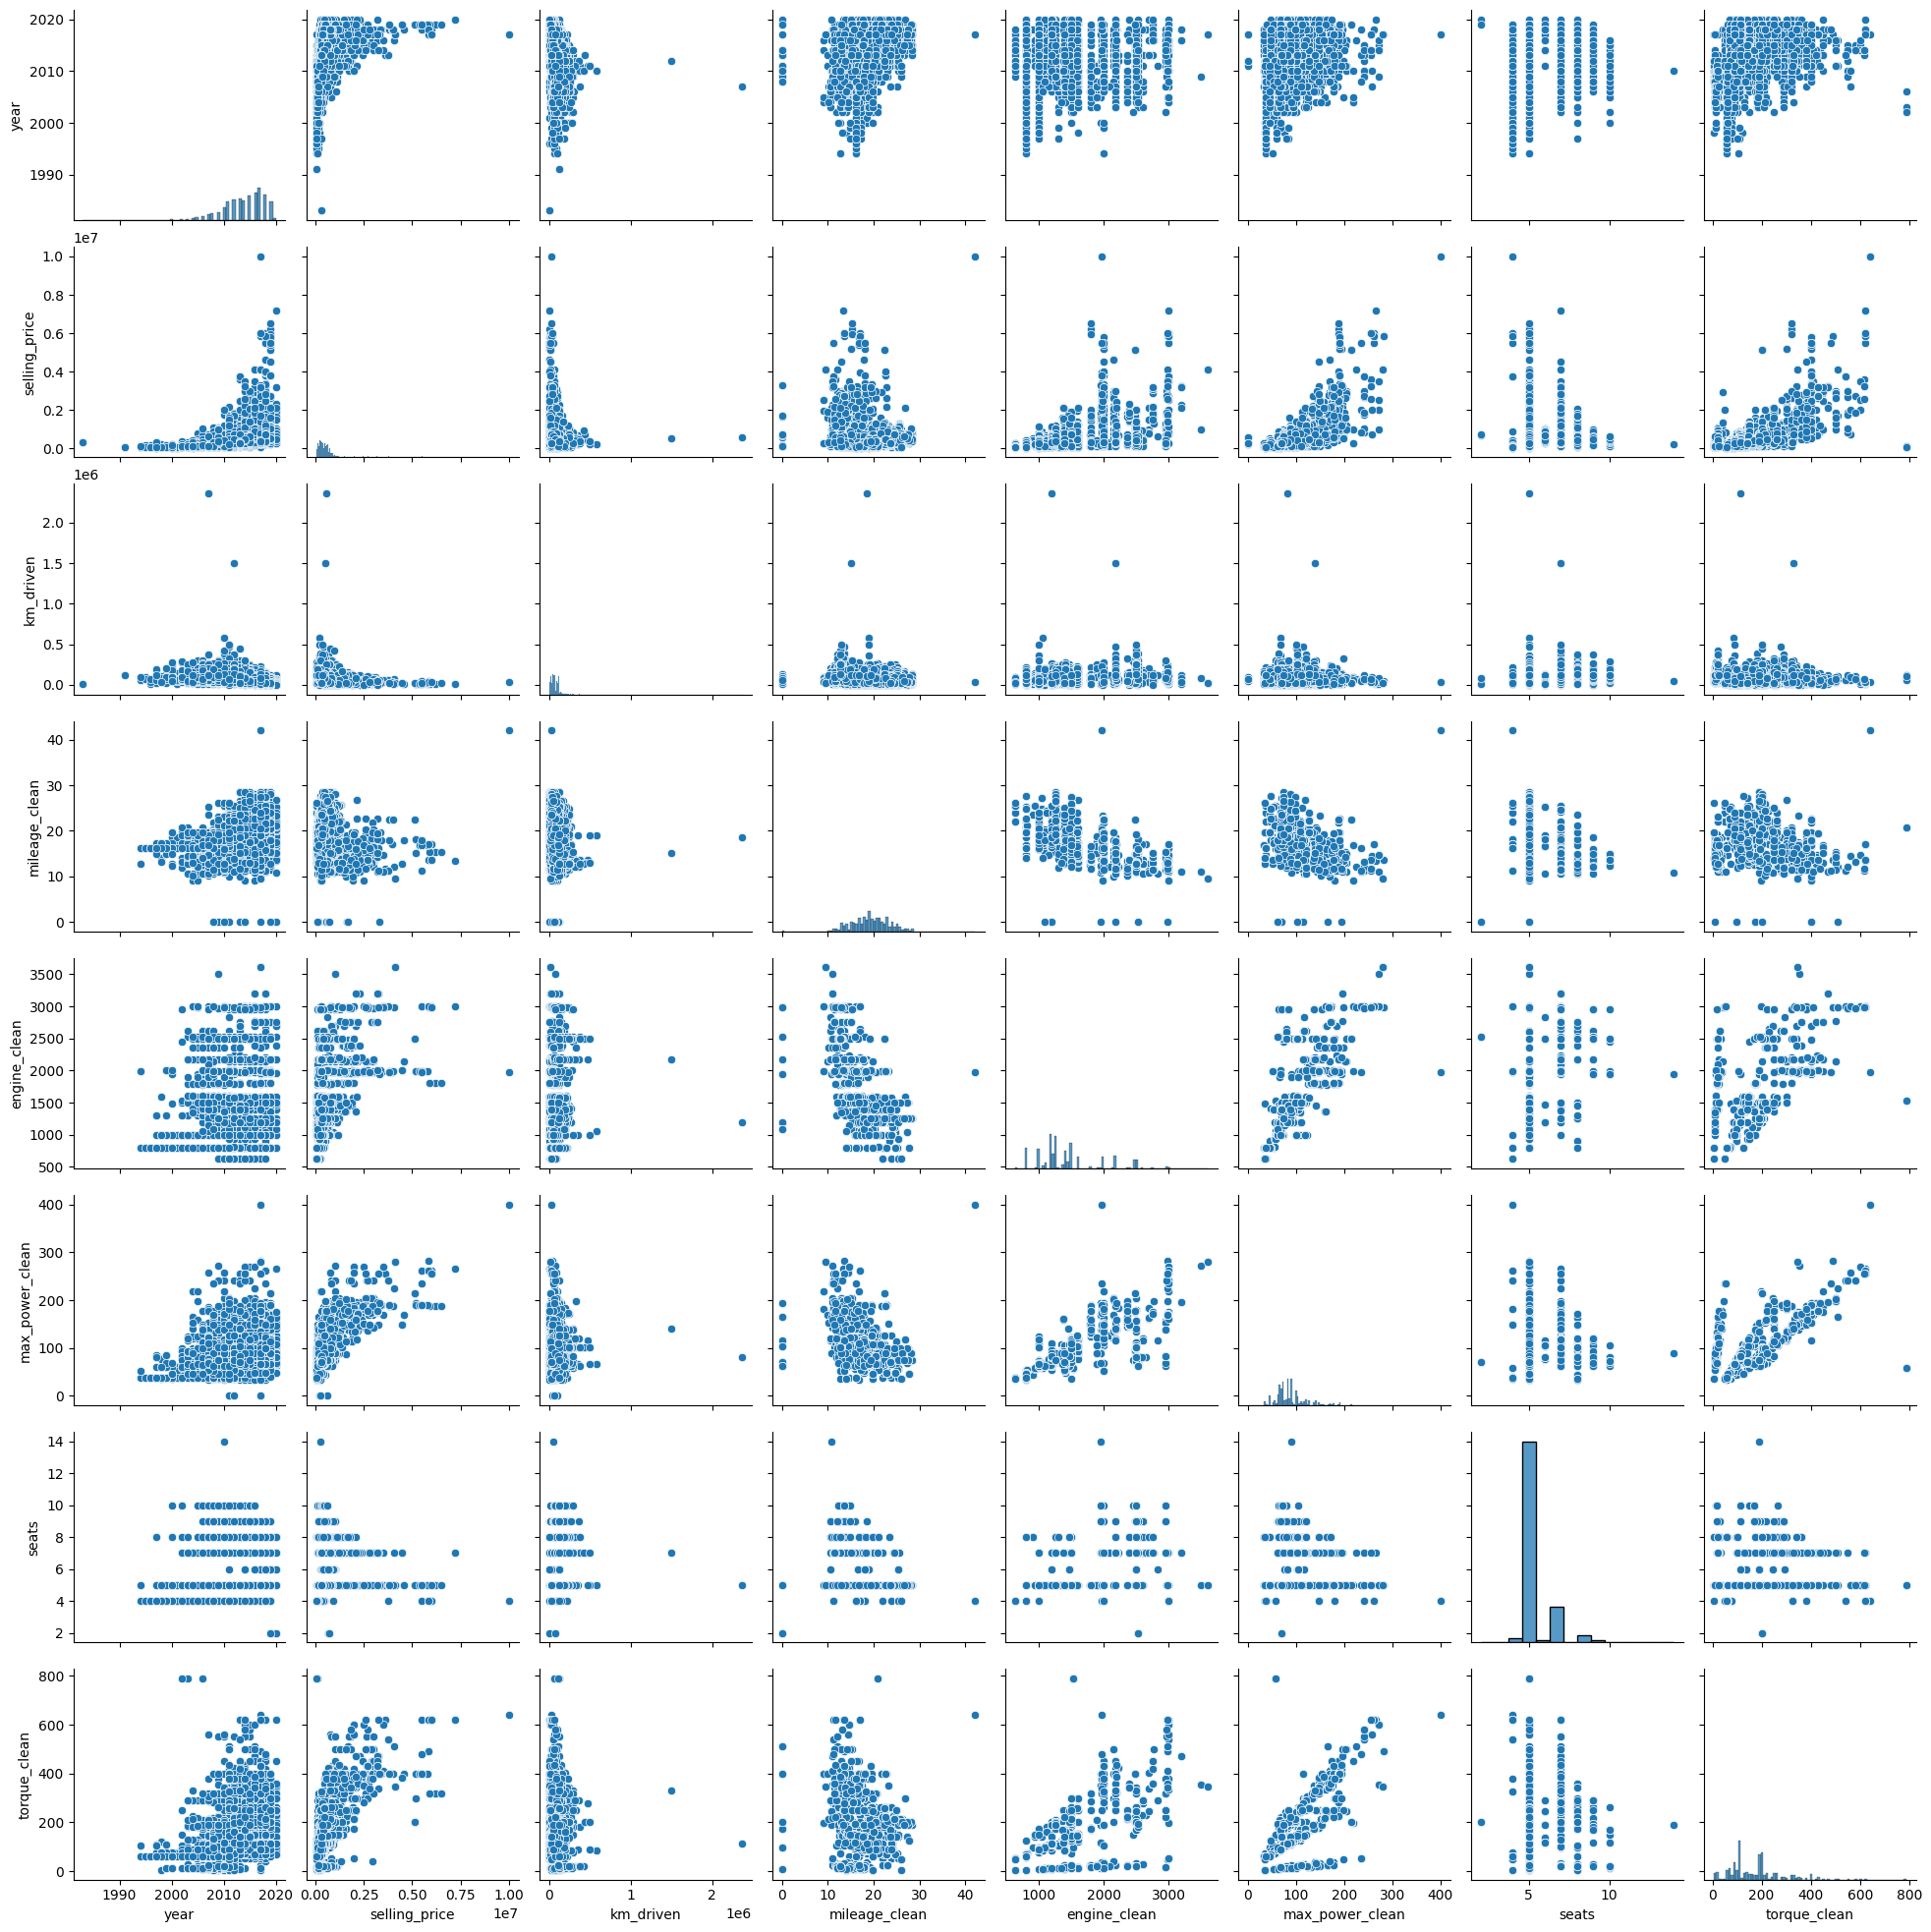

In [369]:
sns.pairplot(df1)

In [370]:
df['max_power_clean'].fillna(df['max_power_clean'].median(),inplace=True)

In [371]:
df['max_power_clean'].isna().sum()

0

In [372]:
df['engine_clean'].fillna(df['engine_clean'].median(),inplace=True)

In [373]:
df['mileage_clean'].fillna(df['mileage_clean'].median(),inplace=True)

In [374]:
df['torque_clean'].fillna(df['torque_clean'].median(),inplace=True)

In [375]:
df['seats'].fillna(5,inplace=True)

In [376]:
df['seats'].isna().sum()

0

In [377]:
df.isna().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage            221
engine             221
max_power          215
torque             222
seats                0
mileage_clean        0
engine_clean         0
max_power_clean      0
torque_clean         0
dtype: int64

In [378]:
df.drop(columns=['mileage', 'engine', 'max_power','torque'],inplace=True)

In [379]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_clean,engine_clean,max_power_clean,torque_clean
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,18.50,1197.0,82.85,113.7
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,16.80,1493.0,110.00,24.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,19.30,1248.0,73.90,190.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,23.57,1396.0,70.00,140.0


In [380]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
seats              0
mileage_clean      0
engine_clean       0
max_power_clean    0
torque_clean       0
dtype: int64

### K-FOLD CROSS VALIDATION

In [381]:
X = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats']] 
y = df['selling_price']

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=7, scoring='neg_mean_squared_error')
mse_scores = -scores

print("Mean Squared Error Scores:", mse_scores) 
print("Mean Squared Error:", mse_scores.mean())

print("root mean squared error scores =", np.sqrt(mse_scores)) 
print("root mean squared error=", np.sqrt(mse_scores).mean())

Mean Squared Error Scores: [3.12662506e+11 1.72692118e+11 2.20910628e+11 2.67677933e+11
 2.75516010e+11 2.00482609e+11 2.08230641e+11]
Mean Squared Error: 236881777908.55716
root mean squared error scores = [559162.3251169  415562.4120416  470011.30574161 517376.00757514
 524896.18999276 447752.84364671 456322.95715421]
root mean squared error= 484440.5773241344


### LINEAR REGRESSION MODEL

In [382]:
X = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats']]
y = df['selling_price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_predict

mse=mean_squared_error(y_test,y_predict)
print(mse)

print("rmse =", np.sqrt)

244445678344.20096
rmse = <ufunc 'sqrt'>


### RIDGE MODEL

In [395]:
from sklearn.linear_model import Ridge
X1 = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats']]
y1 = df['selling_price']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42)
ridge=Ridge(alpha=0.1)
ridge.fit(X1_train,y1_train)
y1_predict=ridge.predict(X1_test)
print(y1_predict)
mse_reidge=mean_squared_error(y1_test,y1_predict)
mse_reidge

[ 198781.71603952 1040327.28772268  538163.32097135 ...  350466.09483114
  430601.9146712   -73669.08501443]


244445564323.4588

### LASSO MODEL

In [384]:
from sklearn.linear_model import Lasso
X2 = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats']]
y2 = df['selling_price']
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=42)
lasso=Lasso(alpha=0.1)
lasso.fit(X2_train,y2_train)
y2_predict=lasso.predict(X2_test)
print(y2_predict)
mse_lasso=mean_squared_error(y2_test,y2_predict)
mse_lasso


[ 198781.67372486 1040325.81813794  538164.41047423 ...  350458.36562388
  430601.98413631  -73673.57452971]


244445674061.09482

### ELASTIC MODEL

In [385]:
from sklearn.linear_model import ElasticNet
X3 = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats']]
y3 = df['selling_price']
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,random_state=42)
elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticnet.fit(X3_train,y3_train)
y3_predict=elasticnet.predict(X3_test)
print(y3_predict)
mse_elast=mean_squared_error(y3_test,y3_predict)
mse_elast



[ 199091.52160853 1044281.51198375  535140.46681465 ...  371523.55025142
  430275.75636102  -61594.27438232]


244195678753.6432

### LINEAR MODEL WITH CATAGORICAL DATA (ONE HOT ENCODER)

In [386]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X4 = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats','fuel','seller_type','owner']]
y4 = df['selling_price']
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.3,random_state=42)
cat_columns=['fuel','seller_type','owner']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_columns)],remainder='passthrough')
combine_cat_linear=Pipeline([('preprocessor',preprocessor),('regressor',LinearRegression())])
combine_cat_linear.fit(X4_train,y4_train)
combine_cat_linear_predict=combine_cat_linear.predict(X4_test)
print(combine_cat_linear_predict)

mse_cat=mean_squared_error(y4_test,combine_cat_linear_predict)
mse_cat




[ 187785.28798214 1037954.60316198  499935.56504764 ...  339476.65948926
  399932.03873774  -19927.47300127]


227835994976.12823

### Ridge with best alpha fit using cross validation

In [415]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
X5 = df[['year', 'torque_clean', 'km_driven','mileage_clean', 'engine_clean', 'max_power_clean','seats']]
y5 = df['selling_price']
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.3,random_state=42)

alphas = np.logspace(-1, 1, 7)
ridge=Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(X5_train,y5_train)

best_alpha = grid_search.best_params_['alpha']
print(best_alpha)
model=Ridge(alpha=best_alpha)
model.fit(X5_train,y5_train)
y5_predict=model.predict(X5_test)
print(y5_predict)
mse_reidge=mean_squared_error(y5_test,y5_predict)
mse_reidge

0.1
[ 198781.71603952 1040327.28772268  538163.32097135 ...  350466.09483114
  430601.9146712   -73669.08501443]


244445564323.4588